# <center>[Optimizing Fonts and Images](https://nextjs.org/learn/dashboard-app/optimizing-fonts-images)</center>

In the previous chapter, you learned how to style your Next.js application. Let's continue working on your home page by adding a custom font and a hero image.

**In this chapter...**

Here are the topics we’ll cover

1. How to add custom fonts with next/font.

2. How to add images with next/image.

3. How fonts and images are optimized in Next.js.

## Why optimize fonts?

Fonts play a significant role in the design of a website, but using custom fonts in your project can affect performance if the font files need to be fetched and loaded.

[Cumulative Layout Shift](https://web.dev/cls/) is a metric used by Google to evaluate the performance and user experience of a website. With fonts, layout shift happens when the browser initially renders text in a fallback or system font and then swaps it out for a custom font once it has loaded. This swap can cause the text size, spacing, or layout to change, shifting elements around it.

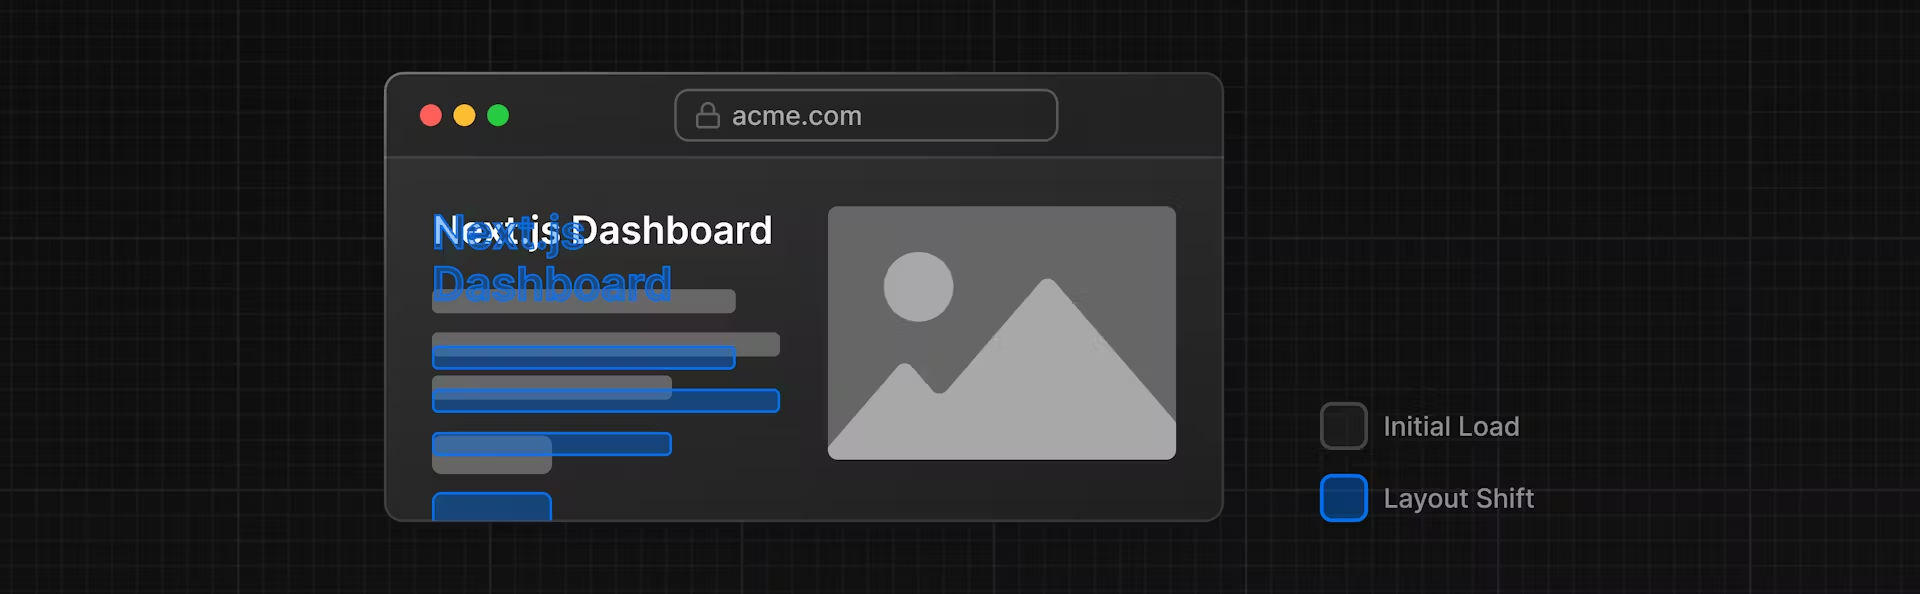

Next.js automatically optimizes fonts in the application when you use the next/font module. It downloads font files at build time and hosts them with your other static assets. This means when a user visits your application, there are no additional network requests for fonts which would impact performance.

## <center>It’s time to take a quiz!</center>

<center>Test your knowledge and see what you’ve just learned.</center>

<center>
How does Next.js optimize fonts?
</center>

A. It causes additional network requests which improve performance.

B. It disables all custom fonts.

C. It preloads all fonts at runtime.

D. It hosts font files with other static assets so that there are no additional network requests.

Next.js downloads font files at build time and hosts them with your other static assets. This means when a user visits your application, there are no additional network requests for fonts which would impact performance.

## Adding a primary font

Let's add a custom Google font to your application to see how this works!

In your `/app/ui` folder, create a new file called `fonts.ts`. You'll use this file to keep the fonts that will be used throughout your application.

Import the `Inter` font from the `next/font/google` module - this will be your primary font. Then, specify what [subset](https://fonts.google.com/knowledge/glossary/subsetting) you'd like to load. In this case, `'latin'`:

In [ ]:
/* /app/ui/fonts.ts */

import { Inter } from 'next/font/google';
 
export const inter = Inter({ subsets: ['latin'] });

Finally, add the font to the `<body>` element in `/app/layout.tsx`:

In [ ]:
// /app/layout.tsx

import '@/app/ui/global.css';
import { inter } from '@/app/ui/fonts';
 
export default function RootLayout({
  children,
}: {
  children: React.ReactNode;
}) {
  return (
    <html lang="en">
      <body className={`${inter.className} antialiased`}>{children}</body>
    </html>
  );
}

By adding `Inter` to the `<body>` element, the font will be applied throughout your application. Here, you're also adding the Tailwind `antialiased` class which smooths out the font. It's not necessary to use this class, but it adds a nice touch.

Navigate to your browser, open dev tools and select the `body` element. You should see `Inter` and `Inter_Fallback` are now applied under styles.

## Practice: Adding a secondary font

You can also add fonts to specific elements of your application.

Now it's your turn! In your `fonts.ts` file, import a secondary font called `Lusitana` and pass it to the `<p>` element in your `/app/page.tsx` file. In addition to specifying a subset like you did before, you'll also need to specify the font **weight**.

Hints:

- If you're unsure what weight options to pass to a font, check the TypeScript errors in your code editor.

- Visit the [Google Fonts](https://fonts.google.com/) website and search for `Lusitana` to see what options are available.

- See the documentation for [adding multiple fonts](https://nextjs.org/docs/app/building-your-application/optimizing/fonts#using-multiple-fonts) and the [full list of options](https://nextjs.org/docs/app/api-reference/components/font#font-function-arguments).

In [ ]:
// /app/ui/fonts.ts

import { Inter, Lusitana } from 'next/font/google';
 
export const inter = Inter({ subsets: ['latin'] });
 
export const lusitana = Lusitana({
  weight: ['400', '700'],
  subsets: ['latin'],
});

In [ ]:
// /app/page.tsx

import AcmeLogo from '@/app/ui/acme-logo';
import { ArrowRightIcon } from '@heroicons/react/24/outline';
import Link from 'next/link';
import { lusitana } from '@/app/ui/fonts';
 
export default function Page() {
  return (
    // ...
    <p
      className={`${lusitana.className} text-xl text-gray-800 md:text-3xl md:leading-normal`}
    >
      <strong>Welcome to Acme.</strong> This is the example for the{' '}
      <a href="https://nextjs.org/learn/" className="text-blue-500">
        Next.js Learn Course
      </a>
      , brought to you by Vercel.
    </p>
    // ...
  );
}

Finally, the `<AcmeLogo />` component also uses Lusitana. It was commented out to prevent errors, you can now uncomment it:

In [ ]:
// /app/page.tsx

// ...
 
export default function Page() {
    return (
      <main className="flex min-h-screen flex-col p-6">
        <div className="flex h-20 shrink-0 items-end rounded-lg bg-blue-500 p-4 md:h-52">
          <AcmeLogo />
          {/* ... */}
        </div>
      </main>
    );
  }

## Why optimize images?

Next.js can serve static assets, like images, under the top-level /[`public`](https://nextjs.org/docs/app/building-your-application/optimizing/static-assets) folder. Files inside `/public` can be referenced in your application.

With regular HTML, you would add an image as follows:

In [ ]:
<img
  src="/hero.png"
  alt="Screenshots of the dashboard project showing desktop version"
/>

However, this means you have to manually:

- Ensure your image is responsive on different screen sizes.

- Specify image sizes for different devices.

- Prevent layout shift as the images load.

- Lazy load images that are outside the user's viewport.

Image Optimization is a large topic in web development that could be considered a specialization in itself. Instead of manually implementing these optimizations, you can use the `next/image` component to automatically optimize your images.

## The `<Image>` component

The `<Image>` Component is an extension of the HTML `<img>` tag, and comes with automatic image optimization, such as:

- Preventing layout shift automatically when images are loading.

- Resizing images to avoid shipping large images to devices with a smaller viewport.

- Lazy loading images by default (images load as they enter the viewport).

- Serving images in modern formats, like [WebP](https://developer.mozilla.org/en-US/docs/Web/Media/Formats/Image_types#webp) and [AVIF](https://developer.mozilla.org/en-US/docs/Web/Media/Formats/Image_types#avif_image), when the browser supports it.
Adding the desk

## Adding the desktop hero image

Let's use the `<Image>` component. If you look inside the `/public` folder, you'll see there are two images: `hero-desktop.png` and `hero-mobile.png`. These two images are completely different, and they'll be shown depending if the user's device is a desktop or mobile.

In your `/app/page.tsx` file, import the component from [`next/image`](https://nextjs.org/docs/api-reference/next/image). Then, add the image under the comment:

In [ ]:
// /app/page.tsx

import AcmeLogo from '@/app/ui/acme-logo';
import { ArrowRightIcon } from '@heroicons/react/24/outline';
import Link from 'next/link';
import { lusitana } from '@/app/ui/fonts';
import Image from 'next/image';
 
export default function Page() {
  return (
    // ...
    <div className="flex items-center justify-center p-6 md:w-3/5 md:px-28 md:py-12">
      {/* Add Hero Images Here */}
      <Image
        src="/hero-desktop.png"
        width={1000}
        height={760}
        className="hidden md:block"
        alt="Screenshots of the dashboard project showing desktop version"
      />
    </div>
    //...
  );
}

Here, you're setting the `width` to `1000` and `height` to `760` pixels. It's good practice to set the `width` and `height` of your images to avoid layout shift, these should be an aspect ratio **identical** to the source image.

You'll also notice the class `hidden` to remove the image from the DOM on mobile screens, and `md:block` to show the image on desktop screens.

This is what your home page should look like now:

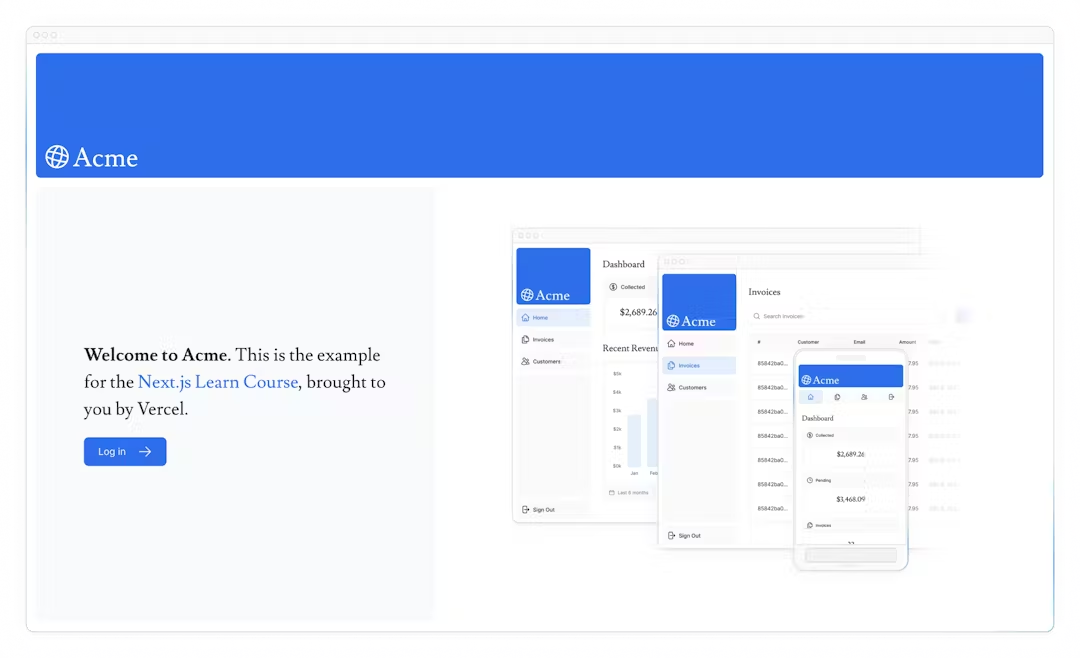

## Practice: Adding the mobile hero image

Now it's your turn! Under the image you've just added, add another `<Image>` component for `hero-mobile.png`.

- The image should have a `width` of `560` and `height` of `620` pixels.

- It should be shown on mobile screens, and hidden on desktop - you can use dev tools to check if the desktop and mobile images are swapped correctly.

In [ ]:
// /app/page.tsx

import AcmeLogo from '@/app/ui/acme-logo';
import { ArrowRightIcon } from '@heroicons/react/24/outline';
import Link from 'next/link';
import { lusitana } from '@/app/ui/fonts';
import Image from 'next/image';
 
export default function Page() {
  return (
    // ...
    <div className="flex items-center justify-center p-6 md:w-3/5 md:px-28 md:py-12">
      {/* Add Hero Images Here */}
      <Image
        src="/hero-desktop.png"
        width={1000}
        height={760}
        className="hidden md:block"
        alt="Screenshots of the dashboard project showing desktop version"
      />
      <Image
        src="/hero-mobile.png"
        width={560}
        height={620}
        className="block md:hidden"
        alt="Screenshot of the dashboard project showing mobile version"
      />
    </div>
    //...
  );
}

Great! Your home page now has a custom font and hero images.

**<center>It’s time to take a quiz!</center>**

<center>Test your knowledge and see what you’ve just learned.</center>

True or False: Images without dimensions and web fonts are common causes of layout shift.

A. True

B. False

**True**: Images without dimensions and web fonts are common causes of layout shift due to the browser having to download additional resources.

## Recommended readng

There's a lot more to learn about these topics, including optimizing remote images and using local font files. If you'd like to dive deeper into fonts and images, see:

- [Image Optimization Docs](https://nextjs.org/docs/app/building-your-application/optimizing/images)

- [Font Optimization Docs](https://nextjs.org/docs/app/building-your-application/optimizing/fonts)

- [Improving Web Performance with Images (MDN)](https://developer.mozilla.org/en-US/docs/Learn/Performance/Multimedia)

- [Web Fonts (MDN)](https://developer.mozilla.org/en-US/docs/Learn/CSS/Styling_text/Web_fonts)


## <center>You've Completed Chapter 3</center>

<center>You've learned how to optimize fonts and images using Next.js.</center>

<center>
Next Up

**4: Creating Layouts and Pages**

Let's create your dashboard routes using nested layouts and pages!

[<button>Start Chapter 4</button>](04_Creating_Layouts_and_Pages.ipynb)
</center>